# Introduction



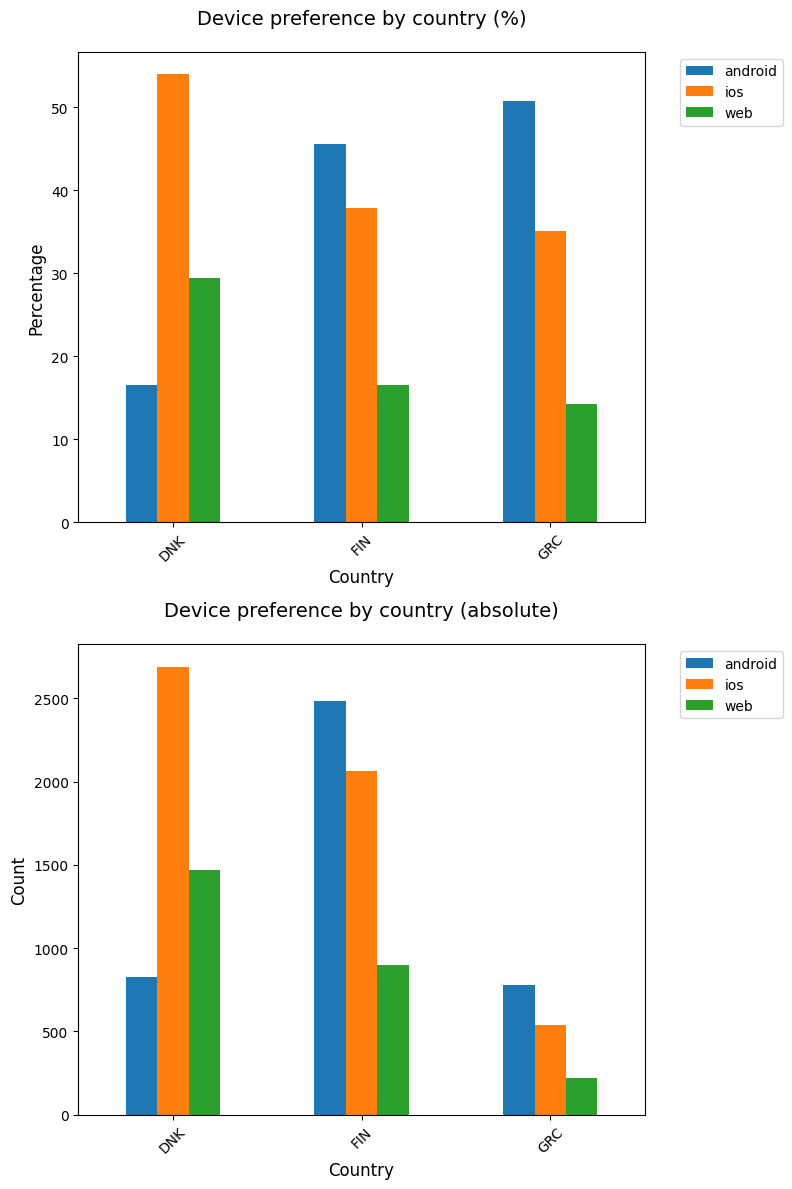

In [1]:
from osCountry import osPlot
from parsing import parseDf

# plot users OS by country
df = parseDf()
osPlot(df)

# Expenditure across platforms

One assumption would be that `web` users would not be spending as much as 



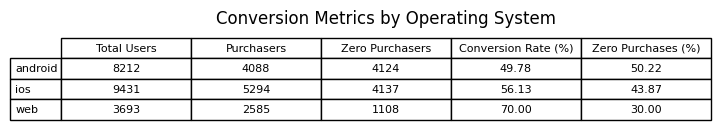

In [2]:
import pandas as pd
from parsing import sliceByCountry
from conversionOs import conversionByOs

df = pd.read_csv('dataset_for_datascience_assignment.csv')
df = sliceByCountry(df)
conversionByOs(df)

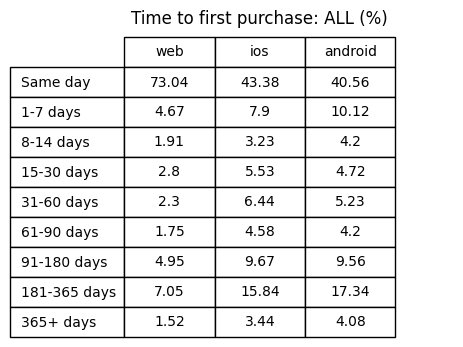

In [3]:
from firstPurchase import firstPurchase

# plot users OS by country
df = parseDf()
# firstPurchase(df, "FIN")
# firstPurchase(df, "GRC")
# firstPurchase(df, "DNK")
firstPurchase(df, "ALL")

In [4]:
from osSpending import spendingByOs

df = parseDf()
spendingByOs(df)

                         web    ios  android
max mean               49.66  42.76    36.44
min mean               29.51  24.39    21.31
max median             40.64  36.58    32.51
min median             23.32  19.27    18.25
25th percentile (min)  16.22  14.20    13.18
75th percentile (min)  35.49  30.42    26.36
25th percentile (max)  27.43  24.38    20.32
75th percentile (max)  58.93  53.85    45.72
